# PUBG Finish Placement Prediction Project
#### In this project we will be working with a Pubg finish placement data set, indicating the finishing placement of players. We will try to create a model that will predict finishing placement in future based of the features of the past placement.
#### This data set contains the following features:

> - DBNOs - Number of enemy players knocked.
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- Id - Player’s Id
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify match. There are no matches that are in both the training and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups - Number of groups we have data for in the match.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('fivethirtyeight')

# Gathering Data

In [2]:
df = pd.read_csv(r'Downloads\Cat\train_V2.csv')

# Assess Data

In [3]:
df.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [4]:
df.shape

(4446966, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [6]:
#statistical summary about the data
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [7]:
#check for missing data
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [4]:
#delete missing record
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [10]:
#check for duplicates
df.duplicated().sum()

0

In [11]:
#showing the columns name and position
for i,col in enumerate(df.columns):
    print(i,col)

0 Id
1 groupId
2 matchId
3 assists
4 boosts
5 damageDealt
6 DBNOs
7 headshotKills
8 heals
9 killPlace
10 killPoints
11 kills
12 killStreaks
13 longestKill
14 matchDuration
15 matchType
16 maxPlace
17 numGroups
18 rankPoints
19 revives
20 rideDistance
21 roadKills
22 swimDistance
23 teamKills
24 vehicleDestroys
25 walkDistance
26 weaponsAcquired
27 winPoints
28 winPlacePerc


# EDA

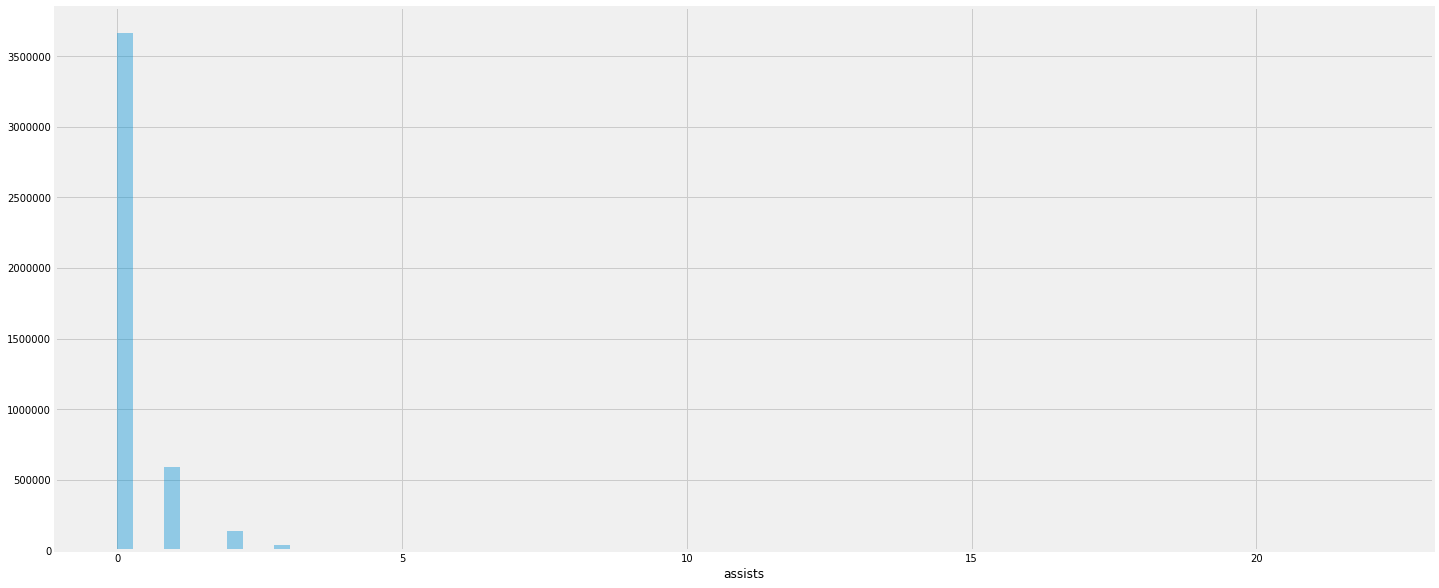

In [12]:
plt.figure(figsize=(22,10))
sns.distplot(df.assists,bins=80,kde=False)
plt.show()

***The Disturbution of assists showing that almost all assists were under 5 assist and the most of assists are 0 which indicate that players tend to kill the enemies without a help from a friend***

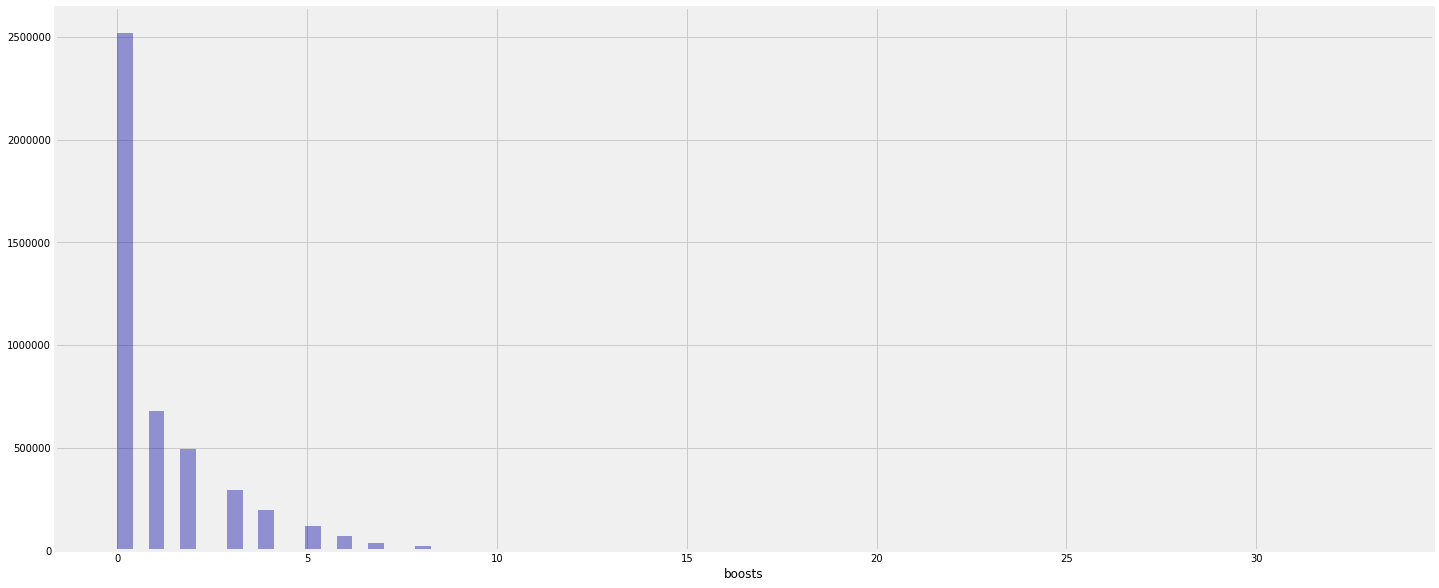

In [13]:
plt.figure(figsize=(22,10))
sns.distplot(df.boosts,bins=80,kde=False,color='#0000A0')
plt.show()

***The Disturbution of boosts showing that almost all boosts were under 10 boost and the most of boosts are 0 which indicate that players usally didn't use boosts***

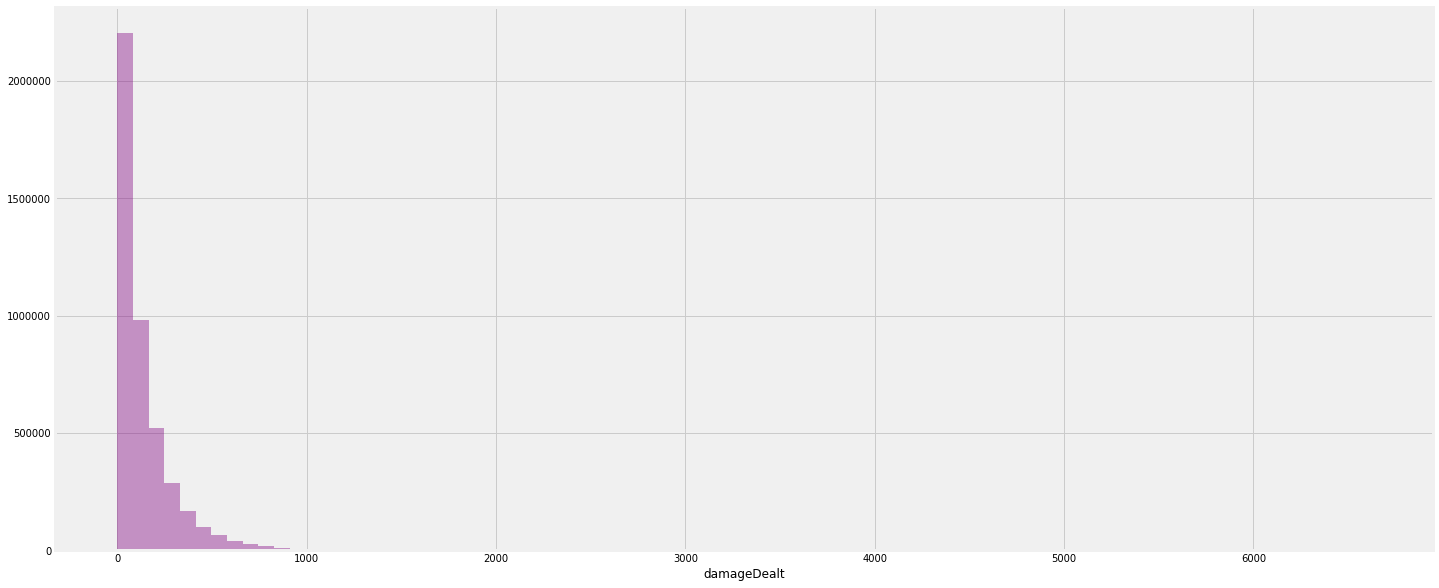

In [14]:
plt.figure(figsize=(22,10))
sns.distplot(df.damageDealt,bins=80,kde=False,color='#800080')
plt.show()

***The Disturbution of damage dealta showing that almost all damage delta were under 1000  and the most of damage delta are 0 which indicate that players had been damaged as the damage enemies***

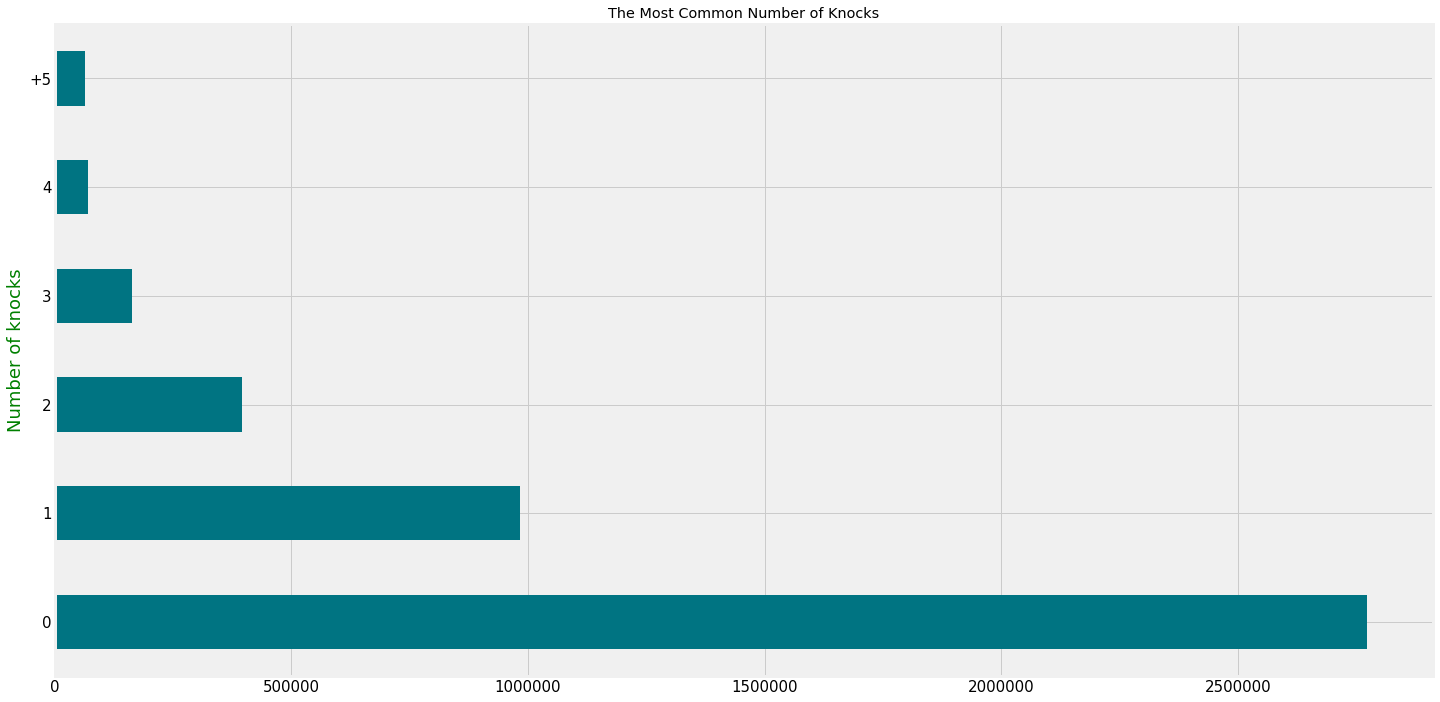

In [15]:
g = pd.cut(df['DBNOs'],[-1,0,1,2,3,4,np.inf],labels=['0','1','2','3','4','+5']).value_counts()

#initializing plot
ax = g.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Number of Knocks')

#x-label
ax.set_ylabel('Number of knocks', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

***THE plot showing that most number of knocks are 0 and a few number above 5***

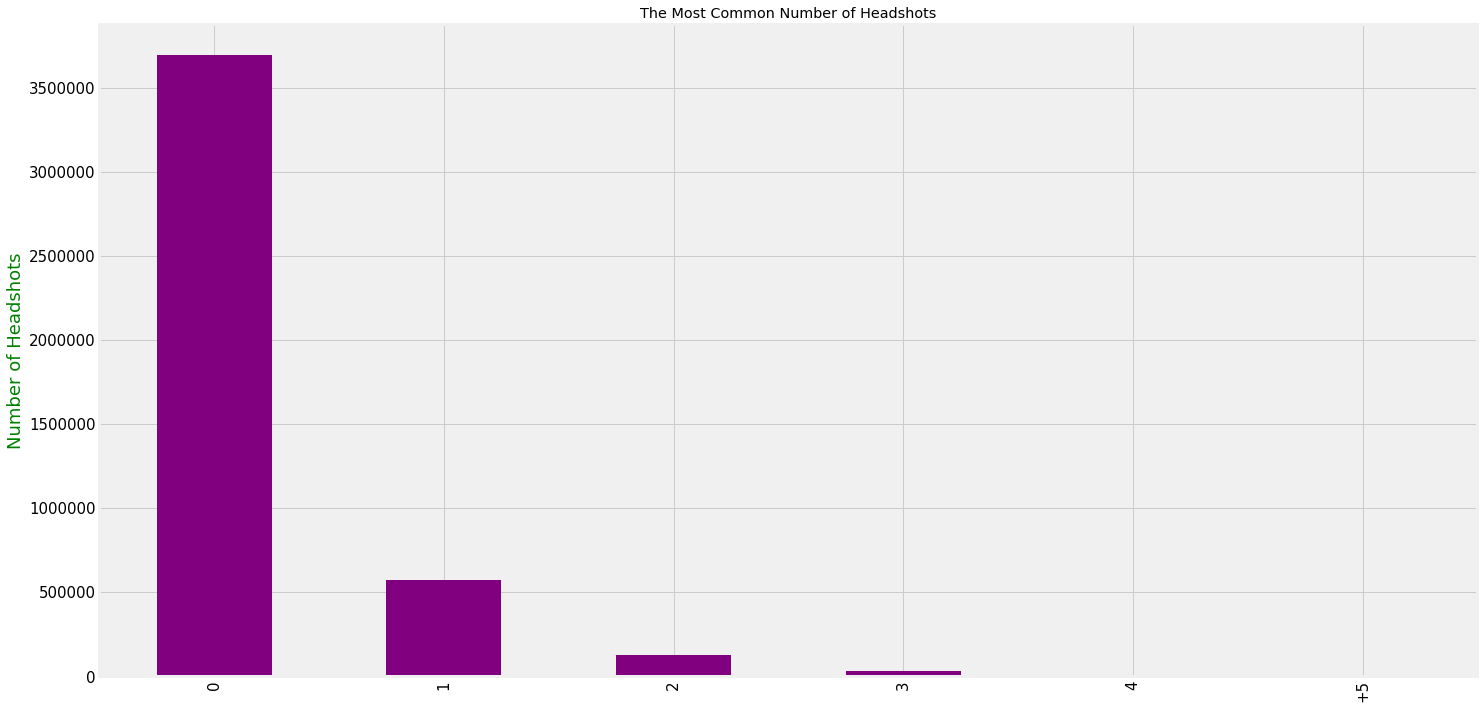

In [16]:
g = pd.cut(df['headshotKills'],[-1,0,1,2,3,4,np.inf],labels=['0','1','2','3','4','+5']).value_counts()

#initializing plot
ax = g.plot.bar(color = '#800080', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Number of Headshots')

#x-label
ax.set_ylabel('Number of Headshots', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

***The plots showing that most common number of headshots are 0 and almost there is no headshots above 4 which indicate that players didn't tend to knock enemies by headshots***

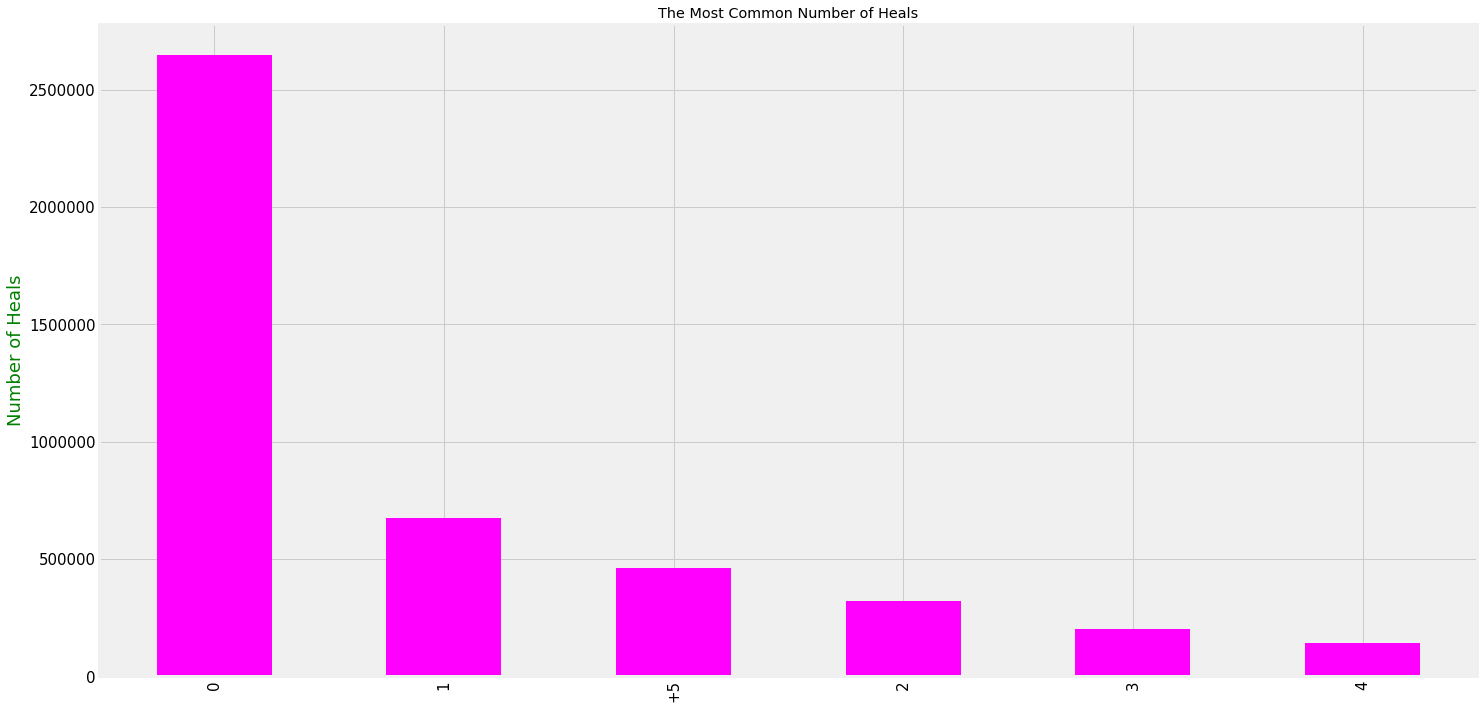

In [17]:
g = pd.cut(df['heals'],[-1,0,1,2,3,4,np.inf],labels=['0','1','2','3','4','+5']).value_counts()

#initializing plot
ax = g.plot.bar(color = '#FF00FF', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Number of Heals')

#x-label
ax.set_ylabel('Number of Heals', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

***THE plot showing that most common number of heals are zero***

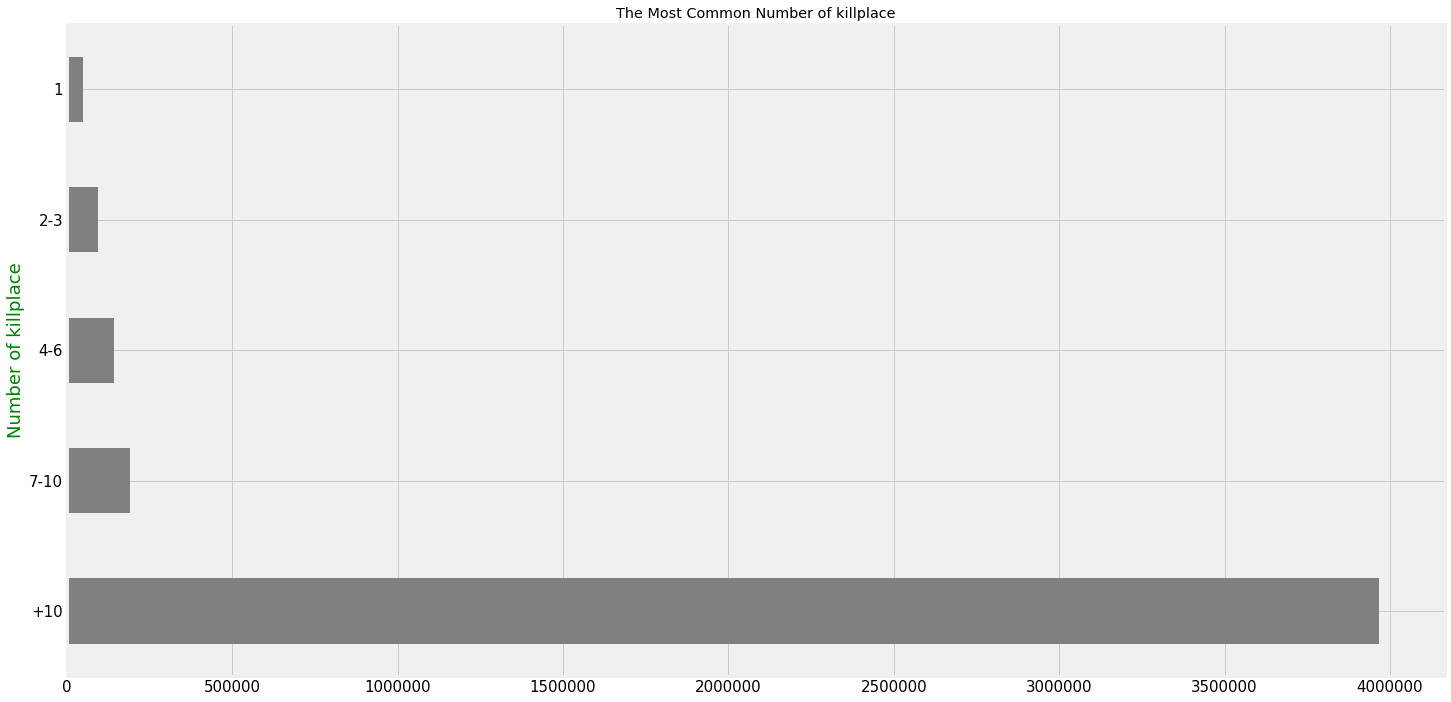

In [18]:
g = pd.cut(df['killPlace'],[-1,1,3,6,10,np.inf],labels=['1','2-3','4-6','7-10','+10']).value_counts()

#initializing plot
ax = g.plot.barh(color = '#808080', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Number of killplace')

#x-label
ax.set_ylabel('Number of killplace', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

***THE plot showing that most common killplace are above 10***

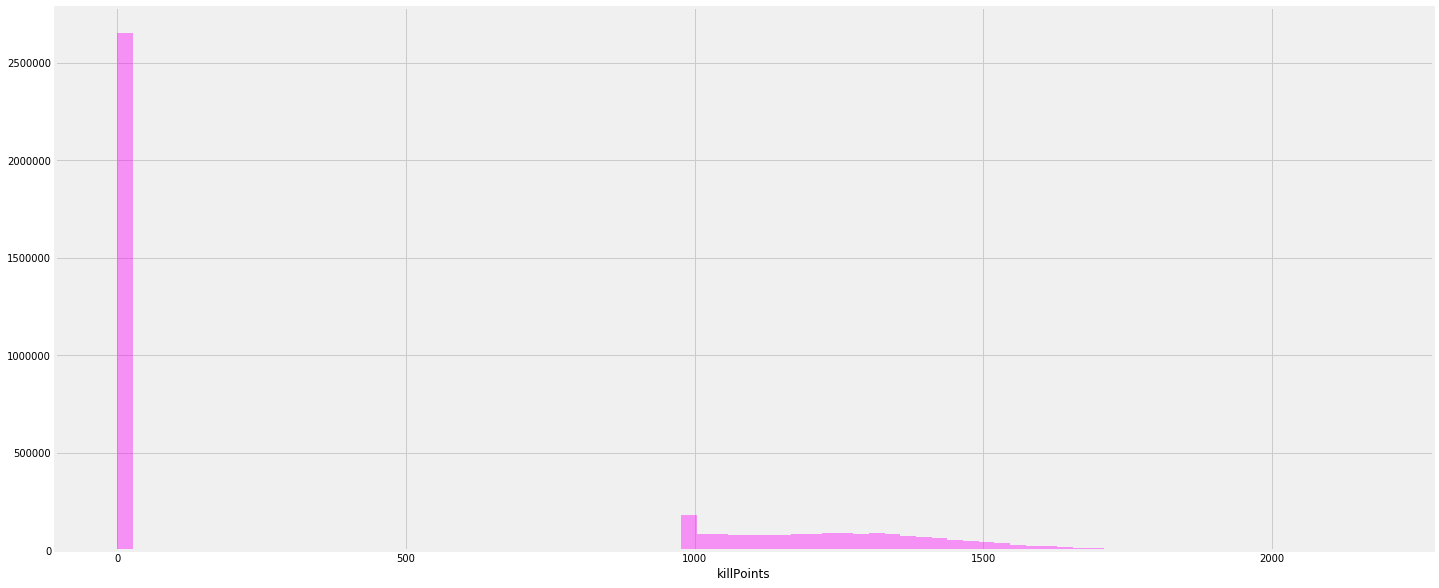

In [19]:
plt.figure(figsize=(22,10))
sns.distplot(df.killPoints,bins=80,kde=False,color='#FF00FF')
plt.show()

***THE plot showing that almost all killpoints equal zero and few of them are from 1000 to 1500***

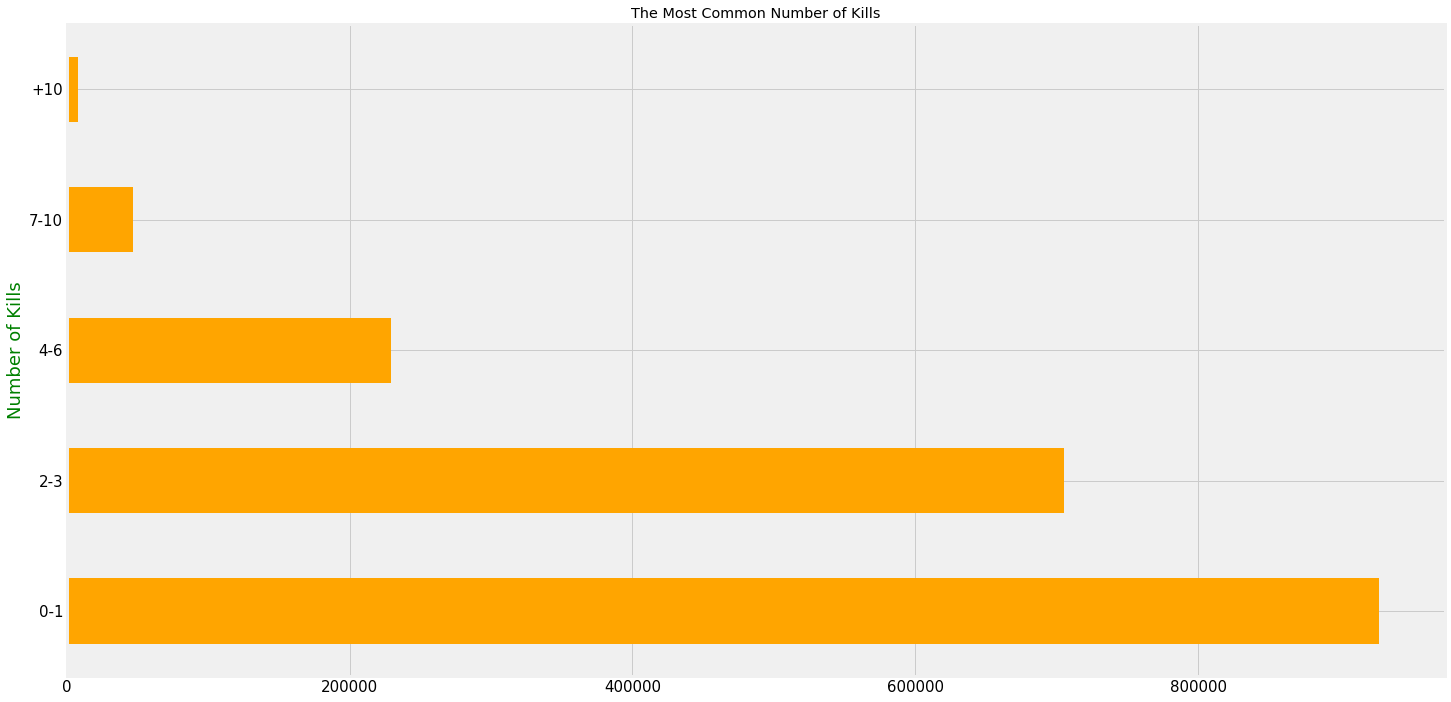

In [20]:
g = pd.cut(df['kills'],[0,1,3,6,10,np.inf],labels=['0-1','2-3','4-6','7-10','+10']).value_counts()

#initializing plot
ax = g.plot.barh(color = '#FFA500', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Number of Kills')

#x-label
ax.set_ylabel('Number of Kills', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

***The plot showing that most number of kills are between 0 and 1 and between 2 and 3***

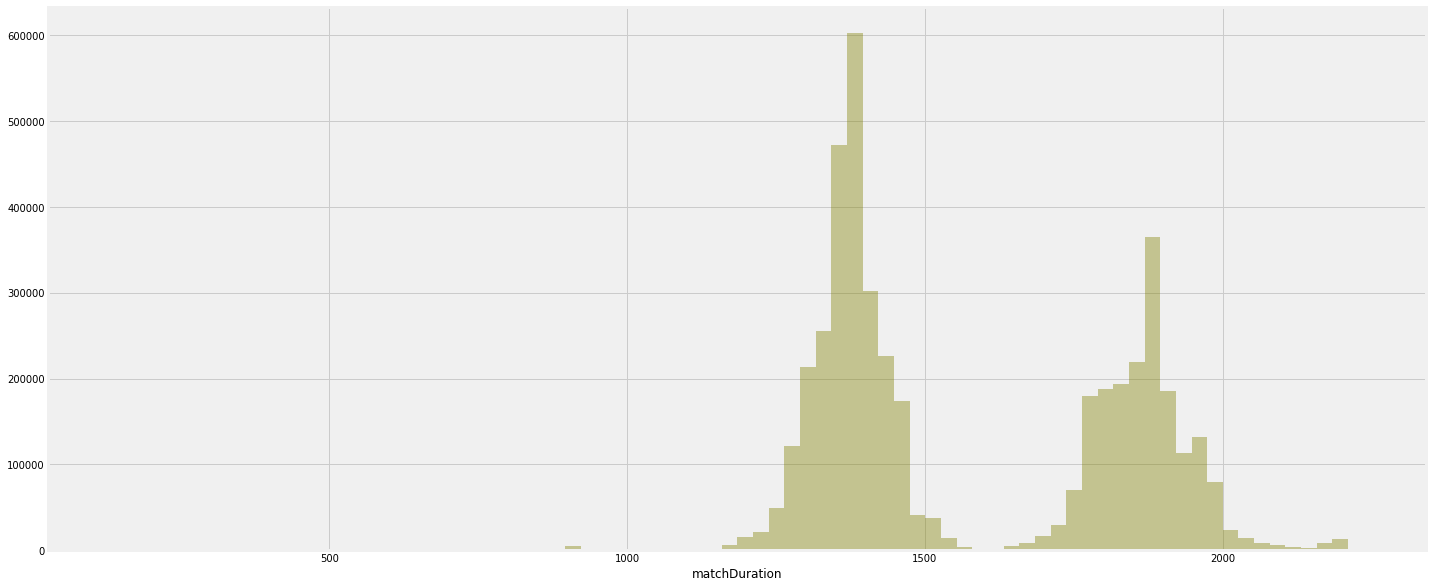

In [21]:
plt.figure(figsize=(22,10))
sns.distplot(df.matchDuration,bins=80,kde=False,color='#808000')
plt.show()

***THE Disturbution shows that most of match took time from 1300s to 1450s and also between 1750s to 2000s***

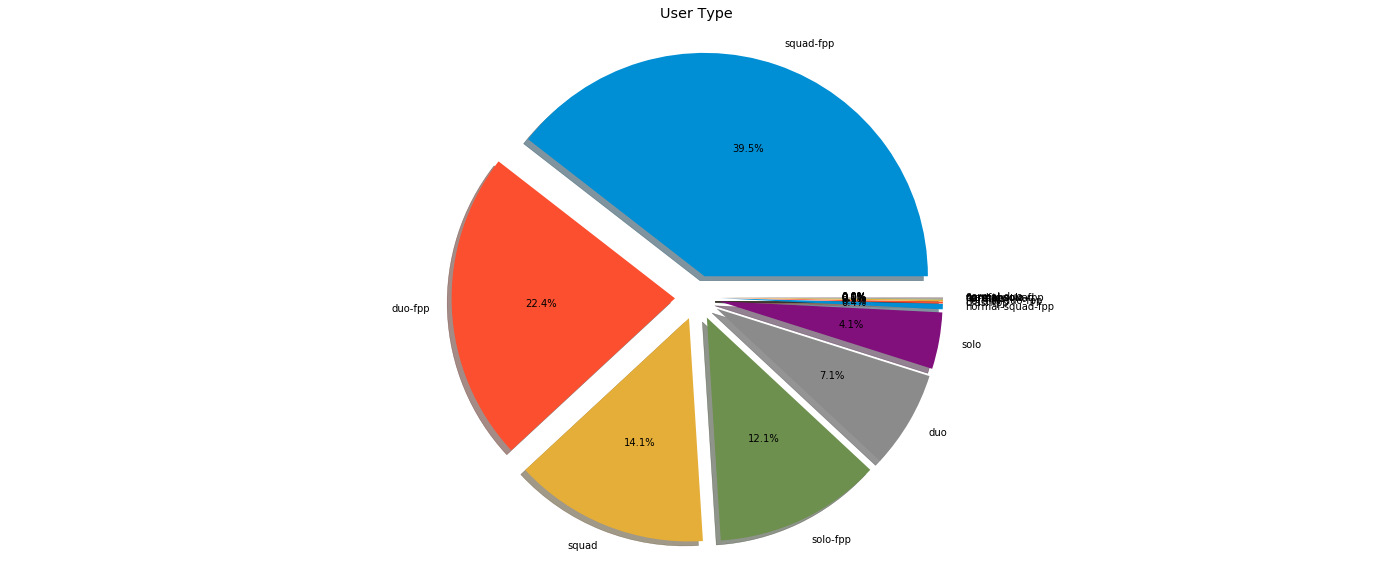

In [22]:
plt.figure(figsize=(22,10))
label=df.matchType.value_counts().index
plt.pie(df.matchType.value_counts(),explode=[0.1]*len(label),labels=label,autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('User Type')
plt.show()

***THE plots showing that most of players play in squad or duo while a few of them play a solo game***

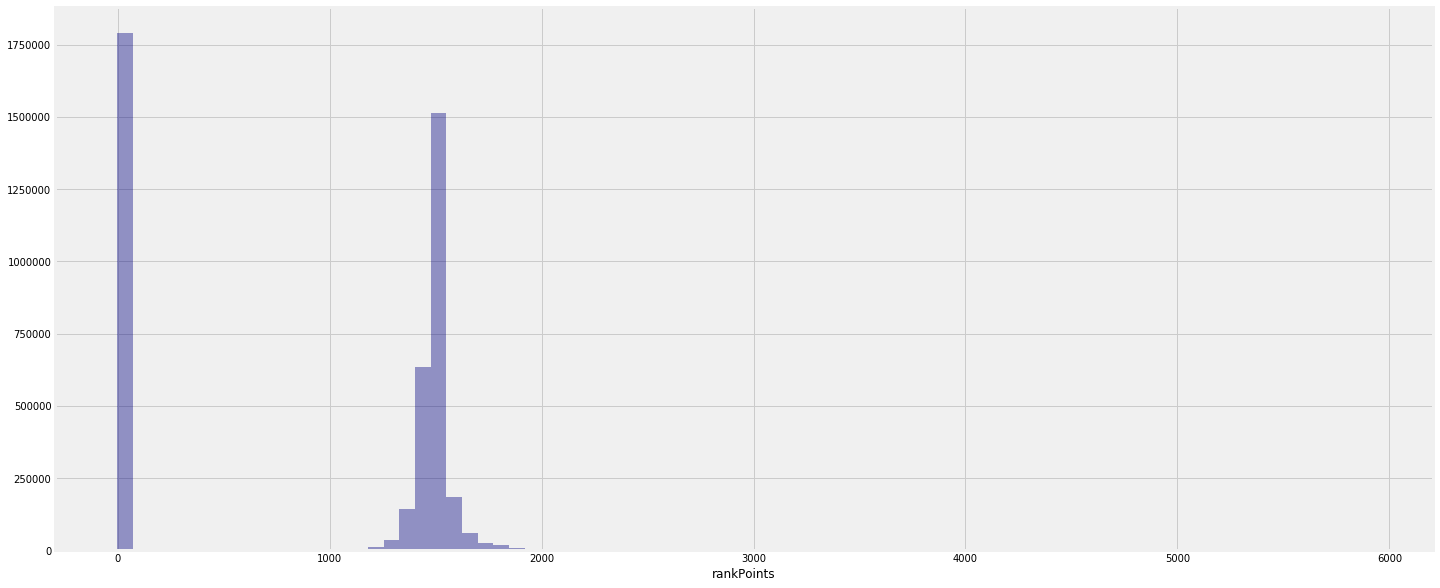

In [23]:
plt.figure(figsize=(22,10))
sns.distplot(df.rankPoints,bins=80,kde=False,color='#000080')
plt.show()

***THE plot showing that most of rankpoints are 0 and there is too many between 1500 and 1700***

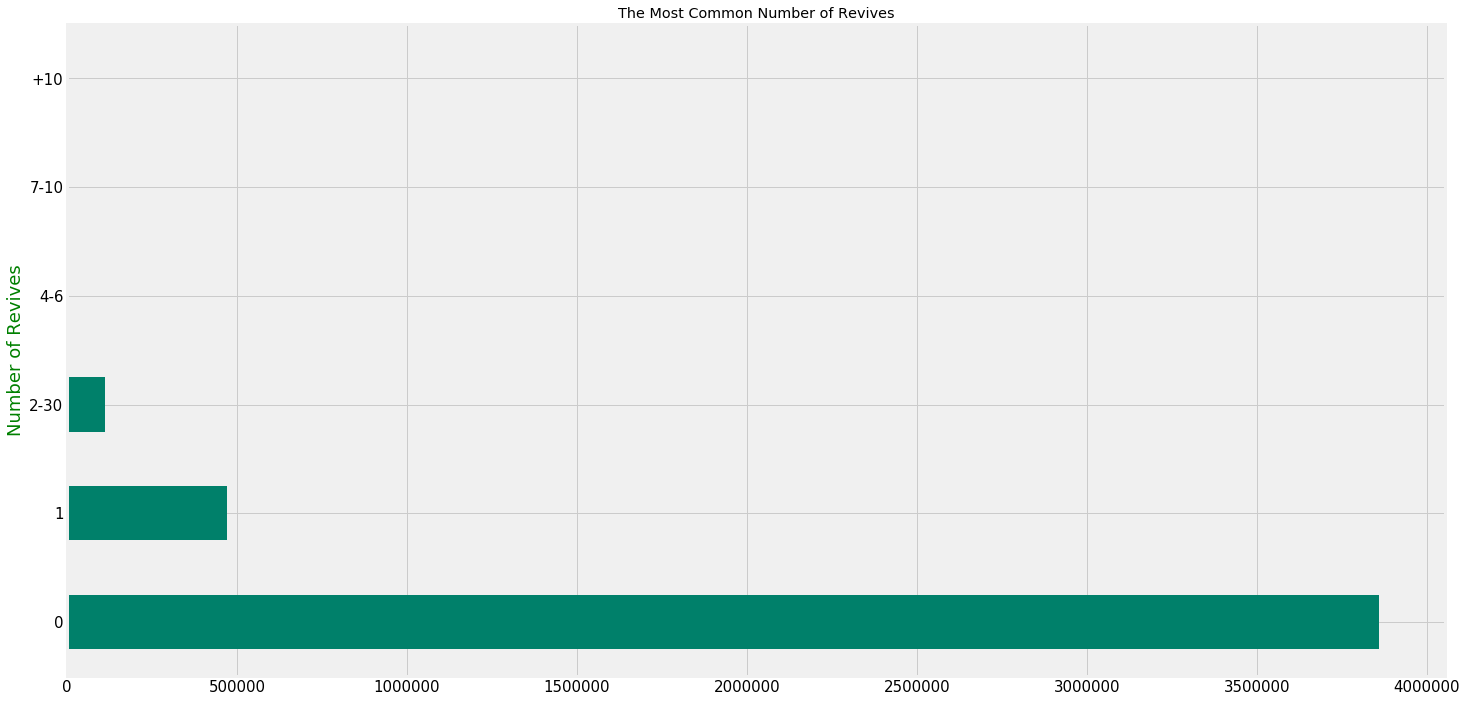

In [24]:
g = pd.cut(df['revives'],[-1,0,1,3,6,10,np.inf],labels=['0','1','2-30','4-6','7-10','+10']).value_counts()

#initializing plot
ax = g.plot.barh(color = '#00806A', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Number of Revives')

#x-label
ax.set_ylabel('Number of Revives', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

***THE plot showing that most of players didn't get revives and they get killed after they get knocked***

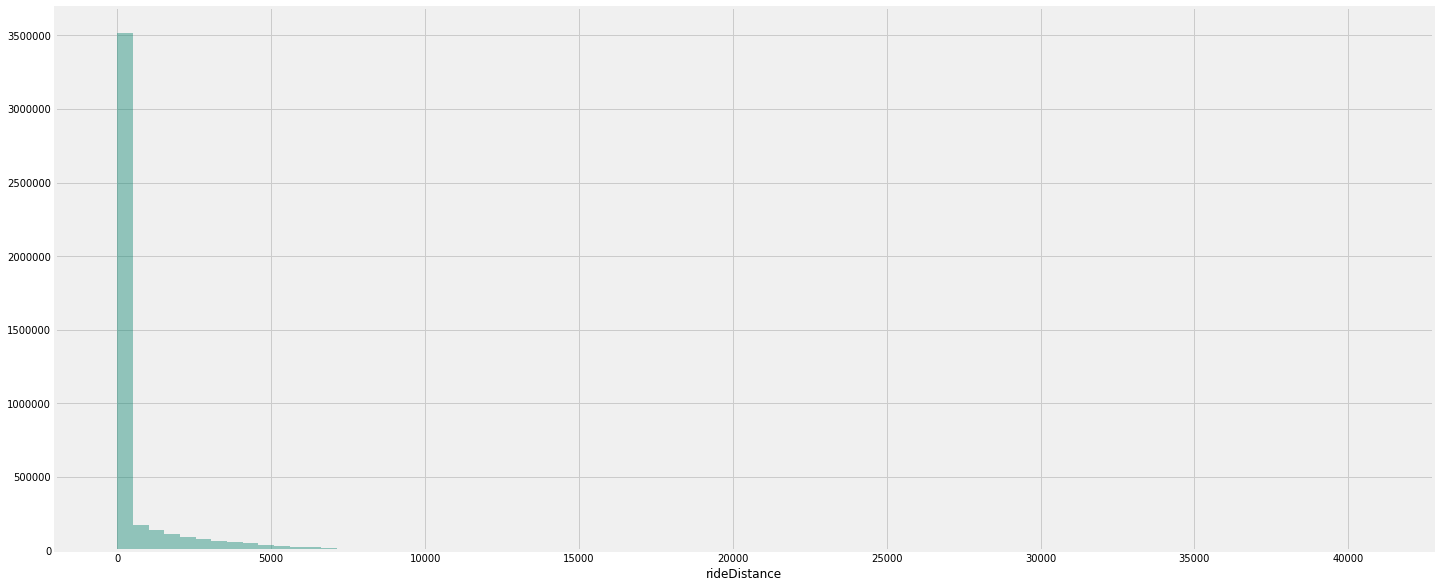

In [25]:
plt.figure(figsize=(22,10))
sns.distplot(df.rideDistance,bins=80,kde=False,color='#00806A')
plt.show()

***THE plot show that most of players didn't ride viechals too much and they tend to walk***

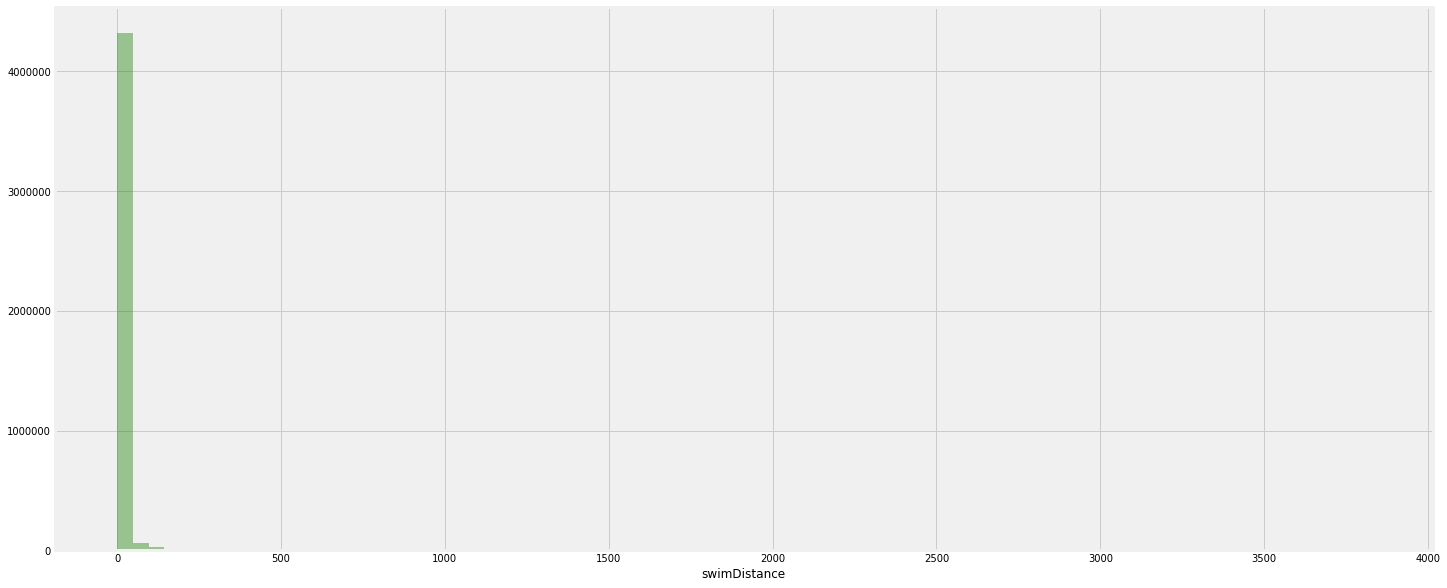

In [26]:
plt.figure(figsize=(22,10))
sns.distplot(df.swimDistance,bins=80,kde=False,color='#158000')
plt.show()

***THE plot show that almost all players didn't swim too much and they tend to walk***

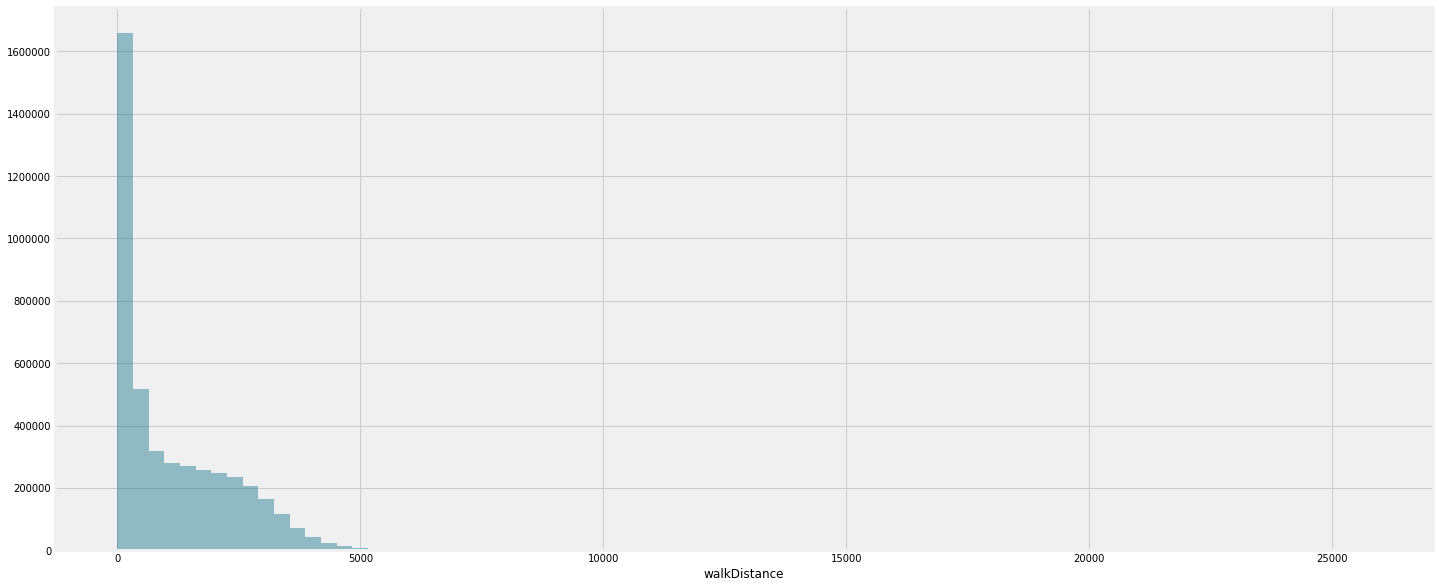

In [27]:
plt.figure(figsize=(22,10))
sns.distplot(df.walkDistance,bins=80,kde=False,color='#006A80')
plt.show()

***THE plot show that most of players didn't walk too much and that cause they were killed after they down***

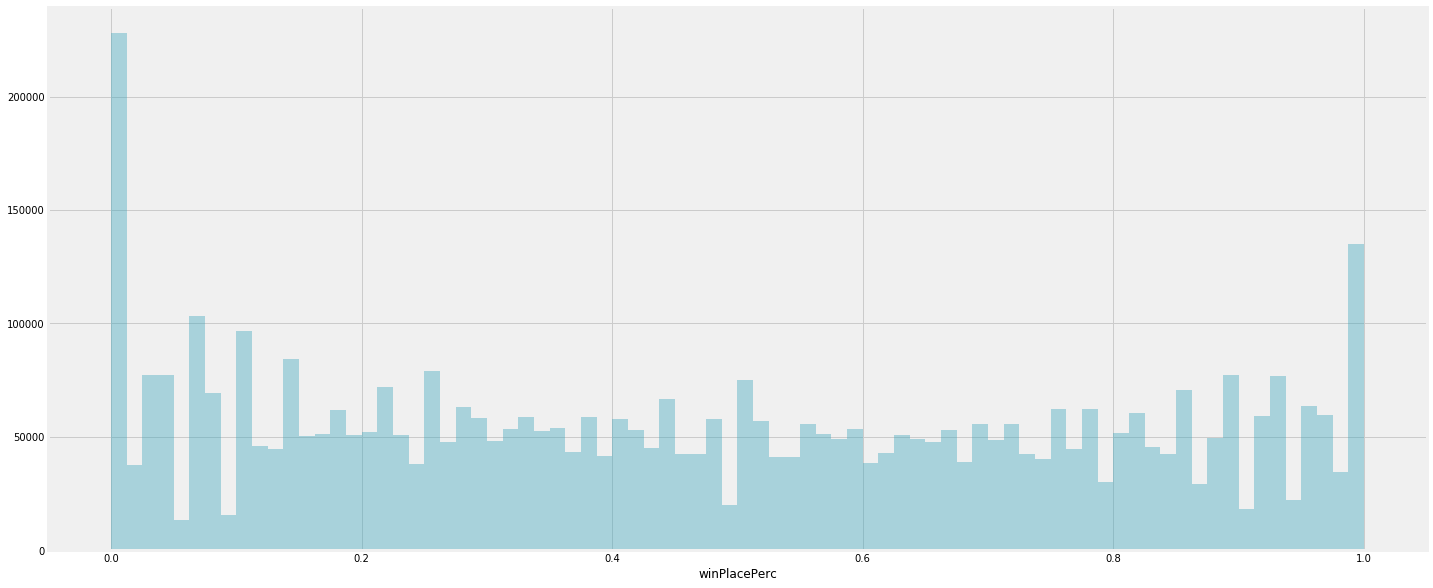

In [28]:
plt.figure(figsize=(22,10))
sns.distplot(df.winPlacePerc,bins=80,kde=False,color='#3CA6BC')
plt.show()

***The plot showing that many of player finished the game in last places where a few of them finished it in the fisrt one***

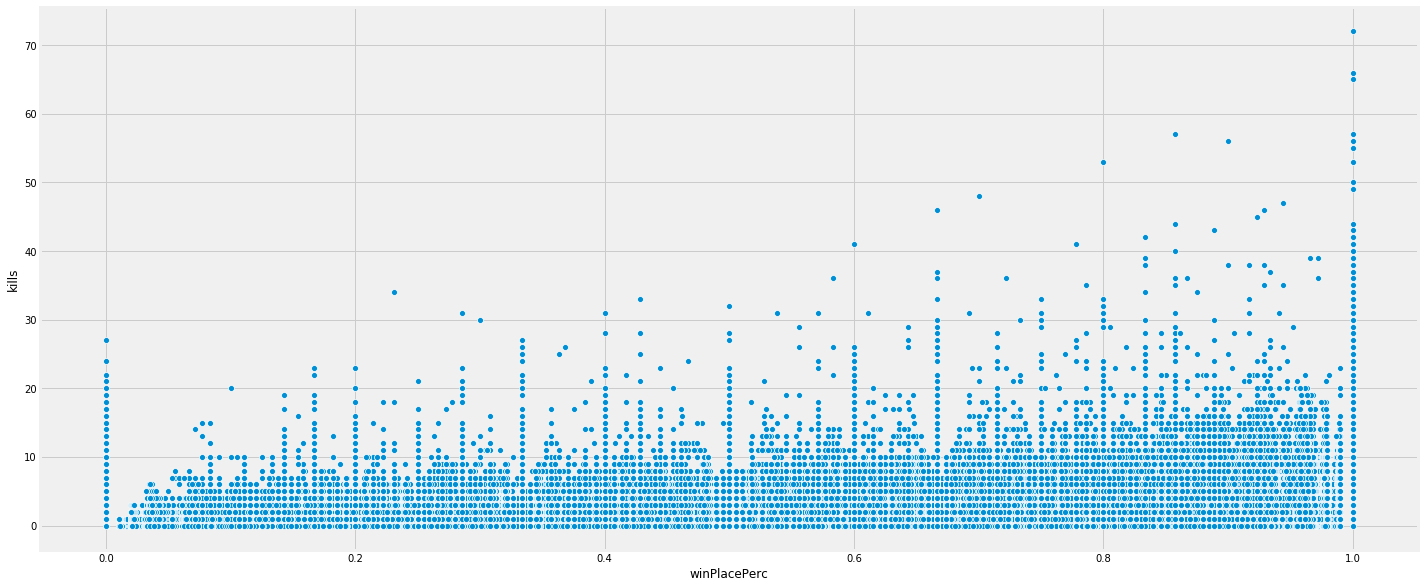

In [29]:
plt.figure(figsize=(22,10))
sns.scatterplot(x=df['winPlacePerc'],y=df['kills'])
plt.show()

***THE plot show that the player who finished the game in advanced places kill more people than other which is normal***

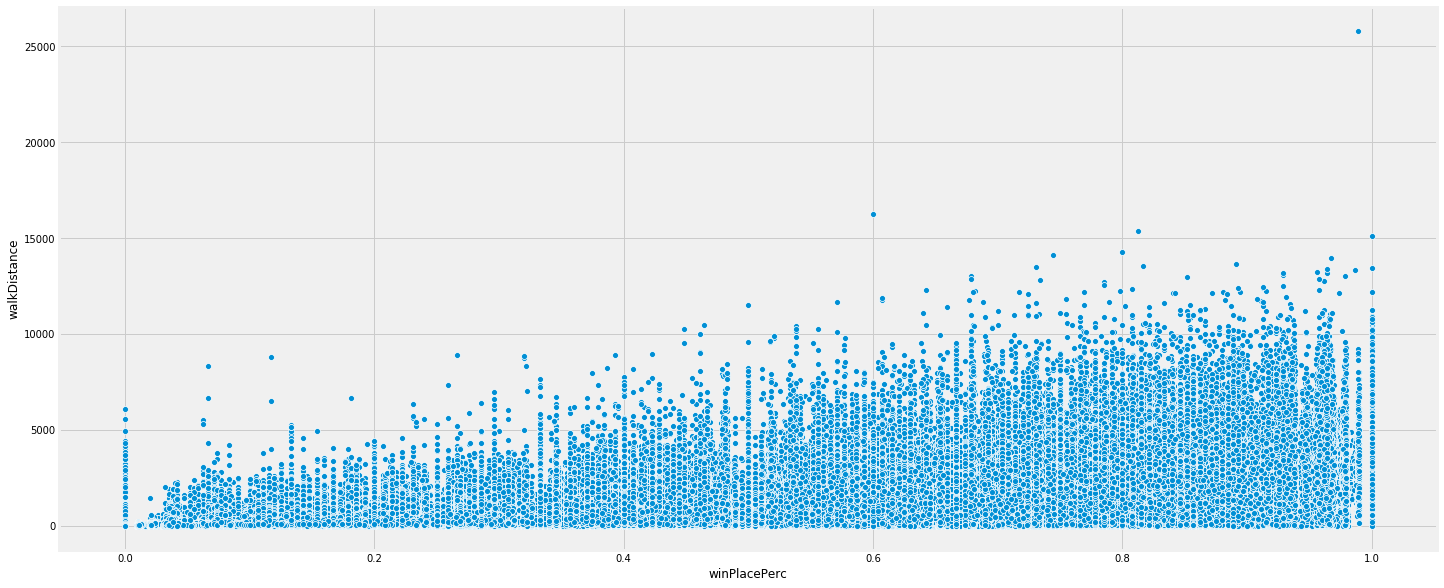

In [30]:
plt.figure(figsize=(22,10))
sns.scatterplot(x=df['winPlacePerc'],y=df['walkDistance'])
plt.show()

***THE plot show that the player who finished the game in advanced places walk more than other which is normal***

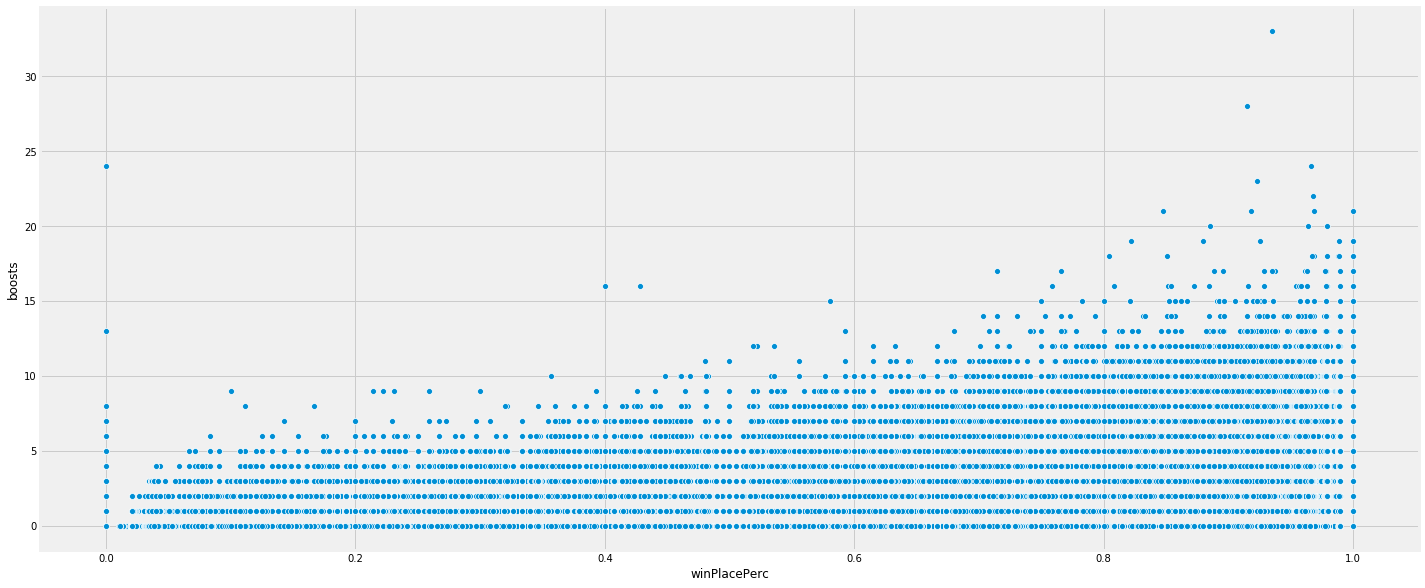

In [31]:
plt.figure(figsize=(22,10))
sns.scatterplot(x="winPlacePerc", y="boosts", data=df)
plt.show()

***THE plot show that the player who finished the game in advanced places use boosts more than other which is normal***

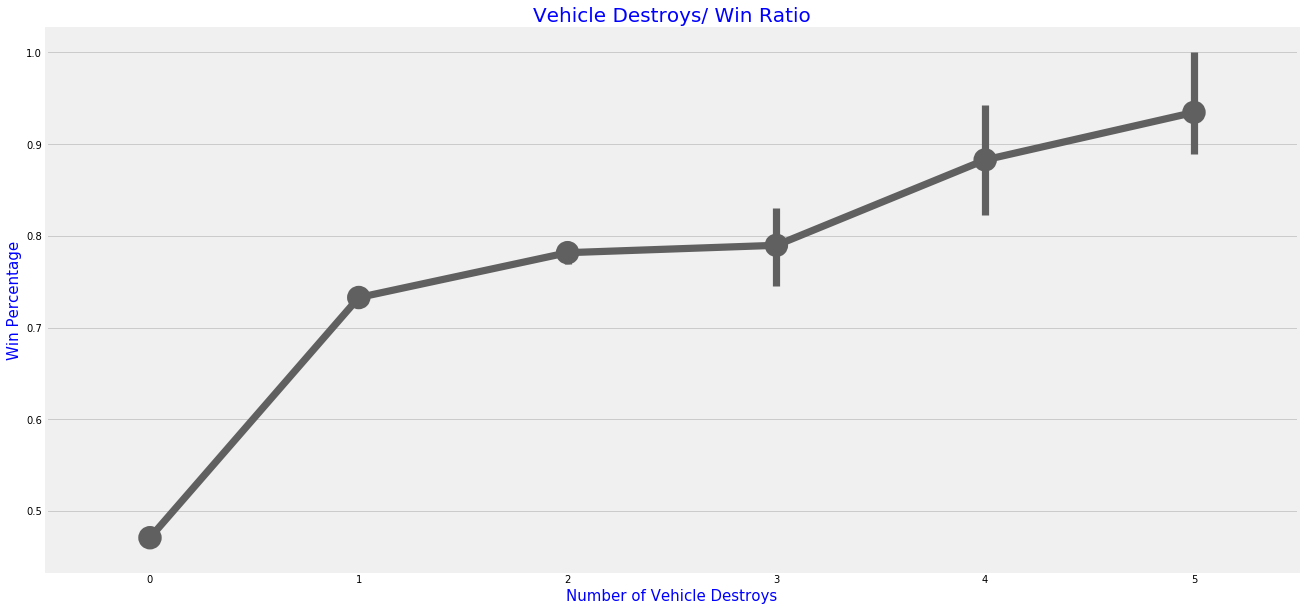

In [32]:
plt.figure(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=df,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.show()

***THE plot show that the player who finished the game in advanced places destroyed more vechicle than other players***

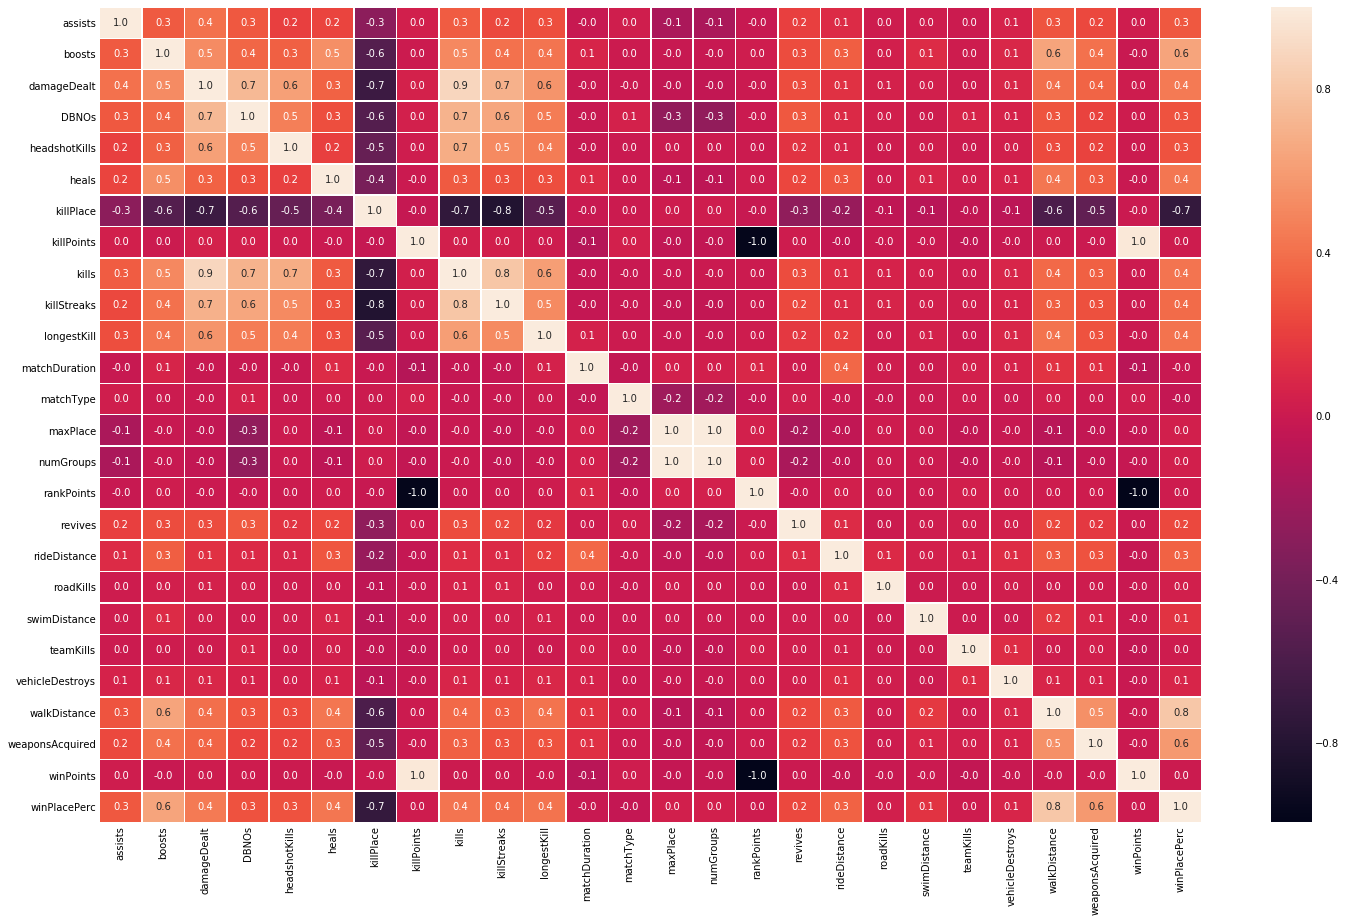

In [5]:
df.matchType=df.matchType.astype('category').cat.codes
plt.figure(figsize=(22, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

In [6]:
#delete string columns ('Id','groupId','matchId')
#delete columns that had low correlation with winplaceperc ('Id','groupId','matchId')
df.drop(['Id','groupId','matchId','rankPoints','roadKills','vehicleDestroys'],axis=1,inplace=True)

In [7]:
#drop outliers from the data
for col in df.columns:
    df1=df[col]
    Q1 = df1.quantile(0.01)
    Q3 = df1.quantile(0.99)
    IQR = Q3-Q1
    minimum = Q1 - 1.5*IQR
    maximum = Q3 + 1.5*IQR
    condition = (df1 <= maximum) & (df1 >= minimum)
    df=df[condition]

In [8]:
#shape of data after deleting outliers
df.shape

(4430399, 23)

In [9]:
#split the data
X=df.drop(['winPlacePerc'],axis=1)
y=df['winPlacePerc']

## Feature Selection using SelectKbest with f_regression as score funcation

In [10]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [11]:
best_feature = SelectKBest(score_func=f_regression,k='all')
fit = best_feature.fit(X,y)

In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
featureScores = featureScores.sort_values(by='Score',ascending=False).reset_index(drop=True)

featureScores

,Feature,Score
0,walkDistance,8.584845e+06
1,killPlace,4.742625e+06
2,boosts,2.989676e+06
3,weaponsAcquired,2.607447e+06
4,damageDealt,1.124634e+06
5,heals,1.015127e+06
6,kills,1.004115e+06
7,longestKill,9.244246e+05
8,killStreaks,7.379926e+05
9,rideDistance,5.940861e+05


In [13]:
#select the best 15 feature
X= X[featureScores.Feature[:15].values]

## Scaling the data using StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler
cols = X.columns
scaler = StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=cols)

## Split the data into train set and  test set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=42)

In [17]:
from sklearn.model_selection import cross_val_score

## Try Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression()

In [24]:
model_reg = cross_val_score(reg,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

In [25]:
-model_reg

array([0.0181527 , 0.01818556, 0.01815215])

## Tuning Linear Regression Parameter

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid={'fit_intercept':[True,False],'normalize':[True,False]}

In [52]:
grid= GridSearchCV(reg,param_grid,cv=3,scoring='neg_mean_squared_error')

In [53]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [54]:
grid.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [55]:
-grid.best_score_

0.018163398885589974

## Try Lasso Model

In [21]:
from sklearn.linear_model import Lasso

In [22]:
lasso=Lasso()

In [58]:
model_lasso = cross_val_score(lasso,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

In [59]:
-model_lasso

array([0.0943434 , 0.0943709 , 0.09438857])

## Try Elastic Net Model

In [23]:
from sklearn.linear_model import ElasticNet

In [24]:
elastic=ElasticNet()

In [23]:
model_elastic = cross_val_score(elastic,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

In [24]:
-model_elastic

array([0.0943434 , 0.0943709 , 0.09438857])

## Try Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rfor = RandomForestRegressor(n_estimators=50)

In [19]:
model_rfor = cross_val_score(rfor,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

In [20]:
-model_rfor

array([0.0105181 , 0.01053239, 0.01051641])

***Can't tune random forest parameter cause it took too much time***

## Try Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
tree = DecisionTreeRegressor()

In [65]:
model_tree = cross_val_score(tree,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

In [66]:
- model_tree

array([0.01988405, 0.0199861 , 0.01994898])

## Finally using VotingRegressor Model

In [27]:
from sklearn.ensemble import VotingRegressor

In [28]:
reg=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
tree=DecisionTreeRegressor()
regressor=[('Linear Regression', reg), ('decision Tree', tree)]
# i didn't use random forest in voting cause it took much time and i haven't now😢😢

In [29]:
vc = VotingRegressor(estimators=regressor)

In [30]:
vc.fit(X_train,y_train)

VotingRegressor(estimators=[('Linear Regression',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=True)),
                            ('decision Tree',
                             DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                           

In [31]:
y_pred = vc.predict(X_test)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error

In [33]:
mean_squared_error(y_test,y_pred)

0.01420742755958744

In [34]:
r2_score(y_test,y_pred)

0.849191408591988

# Predict Testing Data

In [35]:
test = pd.read_csv(r'Downloads\Cat\test_V2.csv')

In [36]:
test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [37]:
test_pred=test.copy()

In [40]:
test_pred = test_pred[X.columns]

In [51]:
test_pred=scaler.fit_transform(test_pred)
test_pred=pd.DataFrame(test_pred,columns=cols)

In [53]:
prediction = vc.predict(test_pred)

In [54]:
test['winPlacePerc'] = prediction

In [55]:
test

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,0,0.0,0,0.000,0,0,588.000,1,0,0.289667
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,2,4669.0,0,0.000,0,0,2017.000,6,0,0.928722
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,0,0.0,0,0.000,0,0,787.800,4,0,0.572988
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,0,0.0,0,0.000,0,0,1812.000,3,0,0.598893
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1,0.0,0,0.000,0,0,2963.000,4,0,0.974484
5,3e2539b5d78183,029b5a79e08cd6,10186f5c852f62,0,0,0.00,0,0,0,89,...,0,0.0,0,0.000,0,0,0.000,0,0,0.057295
6,d812d2f1d88a02,6285bb4eec83e4,f185809740a1a7,0,3,470.70,3,2,17,3,...,0,0.0,0,0.000,0,0,1000.000,4,0,0.647453
7,a8a377e4d43bf8,61ec2e7730a3b8,d31adc82a4930e,0,0,68.61,0,0,0,73,...,0,0.0,0,0.000,0,0,1217.000,5,0,0.313361
8,f18301e30d47d3,e7d609e08f09b6,bcde504ef16743,0,0,0.00,0,0,0,56,...,0,2355.0,0,0.000,0,0,1390.000,7,0,0.552815
9,ec7b965ef978b3,c4c19ef6d6c6d9,6dc5b34c92d5ff,0,0,67.32,0,0,0,54,...,0,0.0,0,0.000,0,0,1634.000,5,1495,0.488543
